In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15, 6) # (w, h)

In [2]:
def eval_model(alfa, x):
    ''' вычисление вектора откликов модели
    '''
    return alfa[0]*np.exp(-alfa[1] * (x-alfa[2])**2)

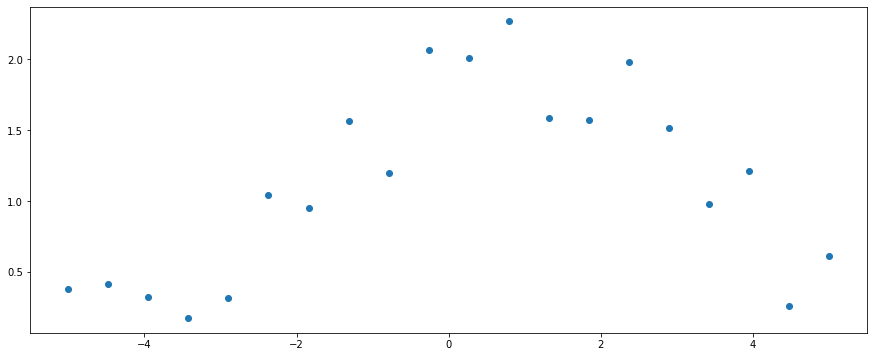

In [3]:
# симулированный эксперимент

n = 20  # число точек

#np.random.seed()
x = np.random.uniform(-5, 5, n)  # предиктор
x = np.linspace(-5,5,n)

noise = 0.4 # амплитуда погрешности
system = [2, 0.1, 1]  # коэффициенты модели
y = eval_model(system, x) + np.random.uniform(-noise, noise, n)  # зависимая переменная
plt.scatter(x,y)

In [4]:
def jacobian(alfa, x):
    ''' вычисление матрицы Якоби при заданных значениях alfa, x
    '''
    num_points = x.size  # число точек эксперимента
    num_params = alfa.size  # число параметров модели
    J = np.zeros((num_points, num_params))
    
    for i in range(num_points):
        f = np.exp(-alfa[1] * (x[i]-alfa[2])**2)
        J[i,0] = f
        J[i,1] = -(x[i]-alfa[2])**2*alfa[0]*f
        J[i,2] = 2*alfa[1]*(x[i]-alfa[2])*alfa[0]*f
    return J

In [5]:
def gaussnewton(x, y, alfa, max_iter, stop_norm=1e-10, lam=0):
    ''' оптимизация параметров модели от начального приближения методом Гаусса-Ньютона
    '''

    error_fn = []

    for i in range(max_iter):
        # вычисление вектора откликов
        r = eval_model(alfa, x) - y
        
        J = jacobian(alfa, x)    
        
        # подстройка параметров модели
        jtj = np.matmul(np.transpose(J), J)
        
        
        alfa_new = alfa - np.matmul(
                    np.matmul(
                        np.linalg.pinv(jtj + lam * np.diag(np.diag(jtj))), 
                        np.transpose(J)), 
                    r)
        
        # норма изменения вектора параметров
        change = np.linalg.norm(alfa_new-alfa) / np.linalg.norm(alfa)
        
        # норма вектора остатков
        error_fn.append(np.linalg.norm(r))
        
        print(i, alfa_new, change)
        
        if change < stop_norm:
            break
            
        alfa = alfa_new
        
    if error_fn[-1] < error_fn[0]:
        print('Поиск завершился удачно, ошибка={}'.format(error_fn[-1]))
    else:
        print('Поиск завершился неудачно')
        
    return alfa, error_fn

In [6]:
alfa = np.array([0.2, 0.35, 0.5]) 
iterations = 20

alfa, err = gaussnewton(x, y, alfa, max_iter=iterations, lam=0.03)

0 [ 1.74373183 -4.80619595  1.83441136] 8.633987572992941
1 [ 1.16824277 -4.79913025  1.82938765] 0.10595883337944101
2 [ 0.7826841  -4.79205416  1.82435284] 0.07321888505925898
3 [ 0.52437252 -4.78496761  1.81930687] 0.049828342377599505
4 [ 0.35131228 -4.77787058  1.81424969] 0.03367301437425757
5 [ 0.23536763 -4.77076301  1.80918125] 0.02269716976500048
6 [ 0.15768855 -4.76364485  1.80410147] 0.01530426553822727
7 [ 0.10564612 -4.75651606  1.7990103 ] 0.010355527128329297
8 [ 0.07077942 -4.74937659  1.79390769] 0.007068590497490832
9 [ 0.04741987 -4.74222639  1.78879357] 0.004915718134833692
10 [ 0.03176975 -4.73506542  1.78366788] 0.00354292649067714
11 [ 0.02128468 -4.72789362  1.77853055] 0.002708053877050475
12 [ 0.01426004 -4.72071094  1.77338154] 0.0022348920935212316
13 [ 0.00955375 -4.71351734  1.76822077] 0.001988264172674856
14 [ 0.0064007  -4.70631276  1.76304818] 0.0018697685478353096
15 [ 4.28825730e-03 -4.69909717e+00  1.75786372e+00] 0.0018171935492178285
16 [ 2.87299

Text(0, 0.5, 'ошибка')

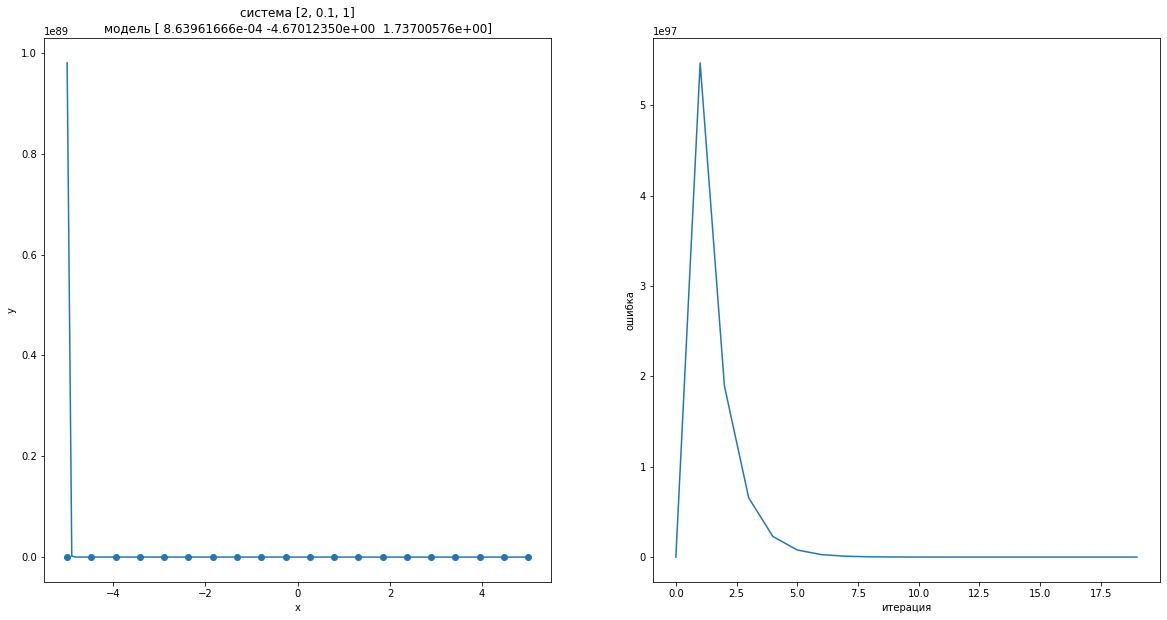

In [7]:
xn = np.linspace(-5,5,100)
yn = eval_model(alfa,xn)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title(u'система {}\nмодель {}'.format(system, alfa))
ax1.plot(xn,yn)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.scatter(x,y)

ax2.plot(err)
ax2.set_xlabel(u'итерация')
ax2.set_ylabel(u'ошибка')

alfa = np.array([0.2, 0.4, 0.5])
iterations = 20

alfa, err = gaussnewton(x, y, alfa, max_iter=iterations, lam=0.01)